In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

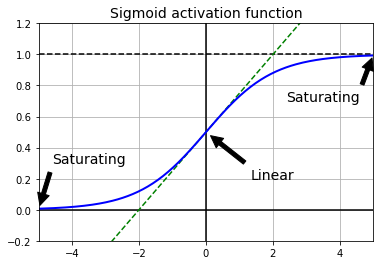

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3 / 4, 7 / 4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), 
             arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), 
             arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), 
             arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title('Sigmoid activation function', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', 
                                          distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

LeakyReLU

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

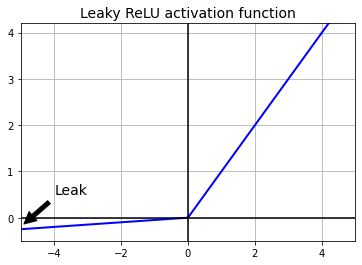

In [8]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2],'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), 
             arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')    
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2819 - acc: 0.6229 - val_loss: 0.8886 - val_acc: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7955 - acc: 0.7362 - val_loss: 0.7130 - val_acc: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6816 - acc: 0.7721 - val_loss: 0.6427 - val_acc: 0.7898
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6217 - acc: 0.7944 - val_loss: 0.5900 - val_acc: 0.8064
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5832 - acc: 0.8075 - val_loss: 0.5582 - val_acc: 0.8198
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5553 - acc: 0.8157 - val_loss: 0.5350 - val_acc: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5338 - acc: 0.8224 - val_loss: 0.5157 - val_acc: 0.8304
Epoch 8/10
1719/1719 [==============================] - 2s 1ms

PReLU

In [14]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')    
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [15]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.3461 - acc: 0.6209 - val_loss: 0.9255 - val_acc: 0.7184
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8197 - acc: 0.7355 - val_loss: 0.7305 - val_acc: 0.7632
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6966 - acc: 0.7693 - val_loss: 0.6564 - val_acc: 0.7884
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6331 - acc: 0.7910 - val_loss: 0.6003 - val_acc: 0.8046
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5917 - acc: 0.8056 - val_loss: 0.5656 - val_acc: 0.8184
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5618 - acc: 0.8135 - val_loss: 0.5406 - val_acc: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5391 - acc: 0.8205 - val_loss: 0.5196 - val_acc: 0.8312
Epoch 8/10
1719/1719 [==============================] - 2s 1ms

ELU

In [16]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

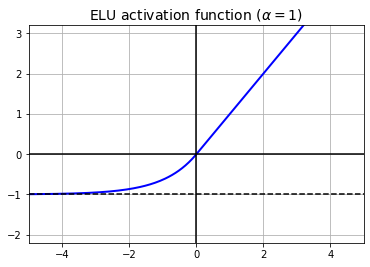

In [17]:
plt.plot(z, elu(z, 1), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='elu'),
    keras.layers.Dense(100, activation='elu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [19]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.1926 - acc: 0.6295 - val_loss: 0.8249 - val_acc: 0.7416
Epoch 2/10
1719/1719 [==============================] - 2s 990us/step - loss: 0.7535 - acc: 0.7523 - val_loss: 0.6783 - val_acc: 0.7816
Epoch 3/10
1719/1719 [==============================] - 2s 987us/step - loss: 0.6544 - acc: 0.7830 - val_loss: 0.6165 - val_acc: 0.7986
Epoch 4/10
1719/1719 [==============================] - 2s 994us/step - loss: 0.6008 - acc: 0.8008 - val_loss: 0.5699 - val_acc: 0.8138
Epoch 5/10
1719/1719 [==============================] - 2s 986us/step - loss: 0.5659 - acc: 0.8103 - val_loss: 0.5418 - val_acc: 0.8234
Epoch 6/10
1719/1719 [==============================] - 2s 992us/step - loss: 0.5410 - acc: 0.8175 - val_loss: 0.5207 - val_acc: 0.8286
Epoch 7/10
1719/1719 [==============================] - 2s 994us/step - loss: 0.5220 - acc: 0.8235 - val_loss: 0.5036 - val_acc: 0.8352
Epoch 8/10
1719/1719 [============================

SELU

In [20]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) \
            * (2 * erfc(np.sqrt(2)) * np.e ** 2 + np.pi \
            * erfc(1 / np.sqrt(2)) ** 2 * np.e - 2 * (2 + np.pi) \
            * erfc (1 / np.sqrt(2)) * np.sqrt(np.e) + np.pi + 2) ** (-1 / 2)

In [21]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

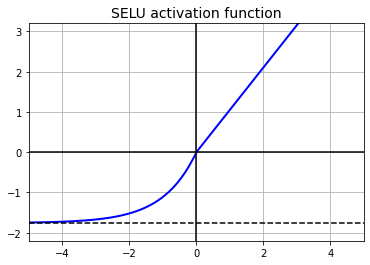

In [22]:
plt.plot(z, selu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title('SELU activation function', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [23]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))

for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print(f'Layer {layer} : mean {means:.2f}, std deviation {stds:.2f}')

Layer 0 : mean -0.00, std deviation 1.00
Layer 100 : mean 0.02, std deviation 0.96
Layer 200 : mean 0.01, std deviation 0.90
Layer 300 : mean -0.02, std deviation 0.92
Layer 400 : mean 0.05, std deviation 0.89
Layer 500 : mean 0.01, std deviation 0.93
Layer 600 : mean 0.02, std deviation 0.92
Layer 700 : mean -0.02, std deviation 0.90
Layer 800 : mean 0.05, std deviation 0.83
Layer 900 : mean 0.02, std deviation 1.00


In [24]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', 
                       kernel_initializer='lecun_normal'),
])

for layer in range(99):
    model.add(keras.layers.Dense(100,activation='selu', 
                                 kernel_initializer='lecun_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [25]:
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train - pixel_means) / pixel_stds
x_valid_scaled = (x_valid - pixel_means) / pixel_stds
x_test_scaled = (x_test - pixel_means) / pixel_stds

In [26]:
history = model.fit(x_train_scaled, y_train, epochs=5, 
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 14s 7ms/step - loss: 1.1822 - acc: 0.5510 - val_loss: 0.8265 - val_acc: 0.6962
Epoch 2/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7644 - acc: 0.7229 - val_loss: 2.9850 - val_acc: 0.3758
Epoch 3/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6871 - acc: 0.7621 - val_loss: 0.6752 - val_acc: 0.7786
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6187 - acc: 0.7894 - val_loss: 0.5686 - val_acc: 0.8120
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5250 - acc: 0.8197 - val_loss: 0.5307 - val_acc: 0.8270


ReLU

In [27]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu', 
                       kernel_initializer='he_normal'),
])

for layer in range(99):
    model.add(keras.layers.Dense(100,activation='relu', 
                                 kernel_initializer='he_normal'))
    
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['acc'])

In [28]:
history = model.fit(x_train_scaled, y_train, epochs=5, 
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 12s 6ms/step - loss: 1.7769 - acc: 0.2940 - val_loss: 1.4043 - val_acc: 0.4278
Epoch 2/5
1719/1719 [==============================] - 9s 6ms/step - loss: 1.1487 - acc: 0.5118 - val_loss: 1.0028 - val_acc: 0.5706
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.9247 - acc: 0.6319 - val_loss: 0.8642 - val_acc: 0.6528
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8684 - acc: 0.6682 - val_loss: 0.8387 - val_acc: 0.6496
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7325 - acc: 0.7302 - val_loss: 0.7029 - val_acc: 0.7492


Batch Normalization

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_213 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_214 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_215 (Dense)            (None, 10)               

In [30]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [31]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['acc'])

In [32]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8750 - acc: 0.7124 - val_loss: 0.5525 - val_acc: 0.8230
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5754 - acc: 0.8030 - val_loss: 0.4725 - val_acc: 0.8472
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5190 - acc: 0.8203 - val_loss: 0.4374 - val_acc: 0.8550
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4827 - acc: 0.8325 - val_loss: 0.4153 - val_acc: 0.8600
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4566 - acc: 0.8407 - val_loss: 0.3997 - val_acc: 0.8640
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4398 - acc: 0.8473 - val_loss: 0.3868 - val_acc: 0.8698
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4242 - acc: 0.8515 - val_loss: 0.3764 - val_acc: 0.8702
Epoch 8/10
1719/1719 [==============================] - 3s 2ms

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_216 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_217 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [34]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['acc'])

In [35]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0317 - acc: 0.6757 - val_loss: 0.6767 - val_acc: 0.7814
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6790 - acc: 0.7792 - val_loss: 0.5566 - val_acc: 0.8182
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5960 - acc: 0.8036 - val_loss: 0.5007 - val_acc: 0.8360
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5447 - acc: 0.8192 - val_loss: 0.4666 - val_acc: 0.8448
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5109 - acc: 0.8279 - val_loss: 0.4434 - val_acc: 0.8538
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4898 - acc: 0.8336 - val_loss: 0.4263 - val_acc: 0.8550
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4712 - acc: 0.8396 - val_loss: 0.4130 - val_acc: 0.8568
Epoch 8/10
1719/1719 [==============================] - 3s 2ms

Gradient Clipping

In [36]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [37]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)